In [4]:
import os
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

import nltk
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.corpus import wordnet

In [ ]:
def create_dataframe_from_folders(base_dir):
    """
    Iterates through all folders and text files in a directory, 
    creates a DataFrame with text content and labels.

    Args:
        base_dir (str): The base directory containing the folders with text files.

    Returns:
        pd.DataFrame: A DataFrame with columns 'text' and 'label'.
    """
    data = []
    
    for folder_name in os.listdir(base_dir):
        folder_path = os.path.join(base_dir, folder_name)
        
        if os.path.isdir(folder_path):
            for file_name in os.listdir(folder_path):
                if file_name.endswith('.txt'):
                    file_path = os.path.join(folder_path, file_name)
                    
                    with open(file_path, 'r', encoding='utf8', errors='ignore') as file:
                        content = file.read().strip()
                    
                    data.append({'text': content, 'label': folder_name})
    
    df = pd.DataFrame(data)
    return df

base_directory = "./data/"


df = create_dataframe_from_folders(base_directory)


print(df.head())
# df.to_csv('./bbc_full_text_cls.csv', index=False)

                                                text     label
0  Ad sales boost Time Warner profit\n\nQuarterly...  business
1  Dollar gains on Greenspan speech\n\nThe dollar...  business
2  Yukos unit buyer faces loan claim\n\nThe owner...  business
3  High fuel prices hit BA's profits\n\nBritish A...  business
4  Pernod takeover talk lifts Domecq\n\nShares in...  business


In [30]:
df = pd.read_csv('./bbc_full_text_cls.csv')
df.head()

,text,label
0,Ad sales boost Time Warner profit\n\nQuarterly...,business
1,Dollar gains on Greenspan speech\n\nThe dollar...,business
2,Yukos unit buyer faces loan claim\n\nThe owner...,business
3,High fuel prices hit BA's profits\n\nBritish A...,business
4,Pernod takeover talk lifts Domecq\n\nShares in...,business


In [32]:
inputs = df['text']
labels = df['label']

<Axes: >

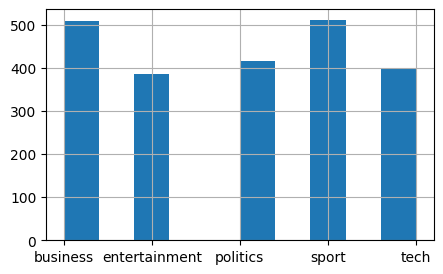

In [33]:
# check if there is imbalance calss
labels.hist(figsize=(5,3))